In [4]:
# Advertising data set. We want to predict if a particular 
# internet user clicks on a Ad or not.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
'''
'Daily Time Spent on Site': consumer time on site in minutes
'Age': cutomer age in years
'Area Income': Avg. Income of geographical area of consumer
'Daily Internet Usage': Avg. minutes a day consumer is on the internet
'Ad Topic Line': Headline of the advertisement
'City': City of consumer
'Male': Whether or not consumer was male
'Country': Country of consumer
'Timestamp': Time at which consumer clicked on Ad or closed window
'Clicked on Ad': 0 or 1 indicated clicking on Ad
'''

"\n'Daily Time Spent on Site': consumer time on site in minutes\n'Age': cutomer age in years\n'Area Income': Avg. Income of geographical area of consumer\n'Daily Internet Usage': Avg. minutes a day consumer is on the internet\n'Ad Topic Line': Headline of the advertisement\n'City': City of consumer\n'Male': Whether or not consumer was male\n'Country': Country of consumer\n'Timestamp': Time at which consumer clicked on Ad or closed window\n'Clicked on Ad': 0 or 1 indicated clicking on Ad\n"

In [6]:
Ad = pd.read_csv('advertising.csv')

In [48]:
Ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [49]:
Ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<Figure size 3600x2400 with 0 Axes>

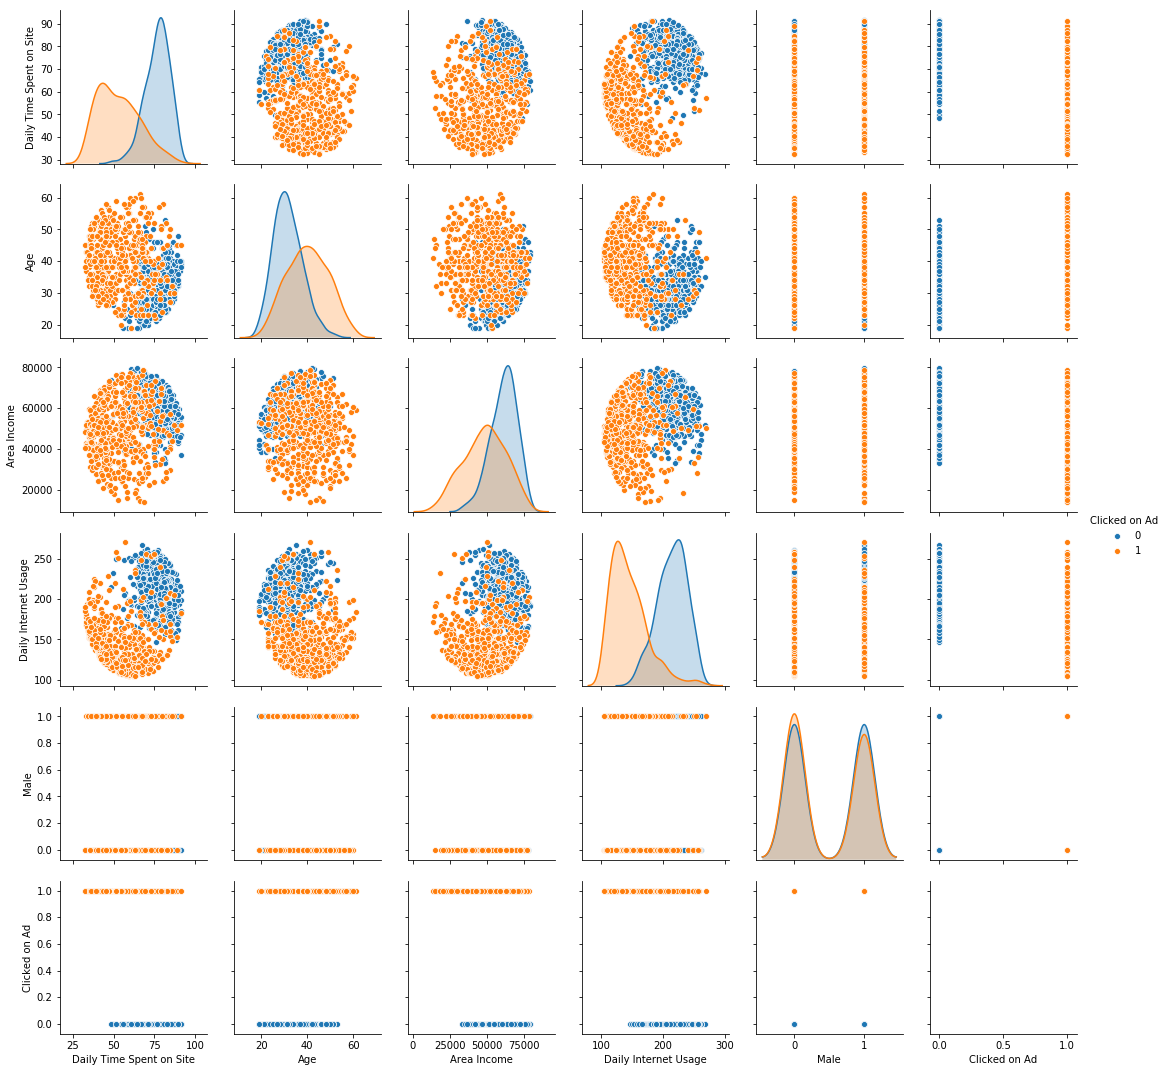

In [10]:
fig = plt.figure(dpi = 600)
sns.pairplot(Ad, hue='Clicked on Ad')

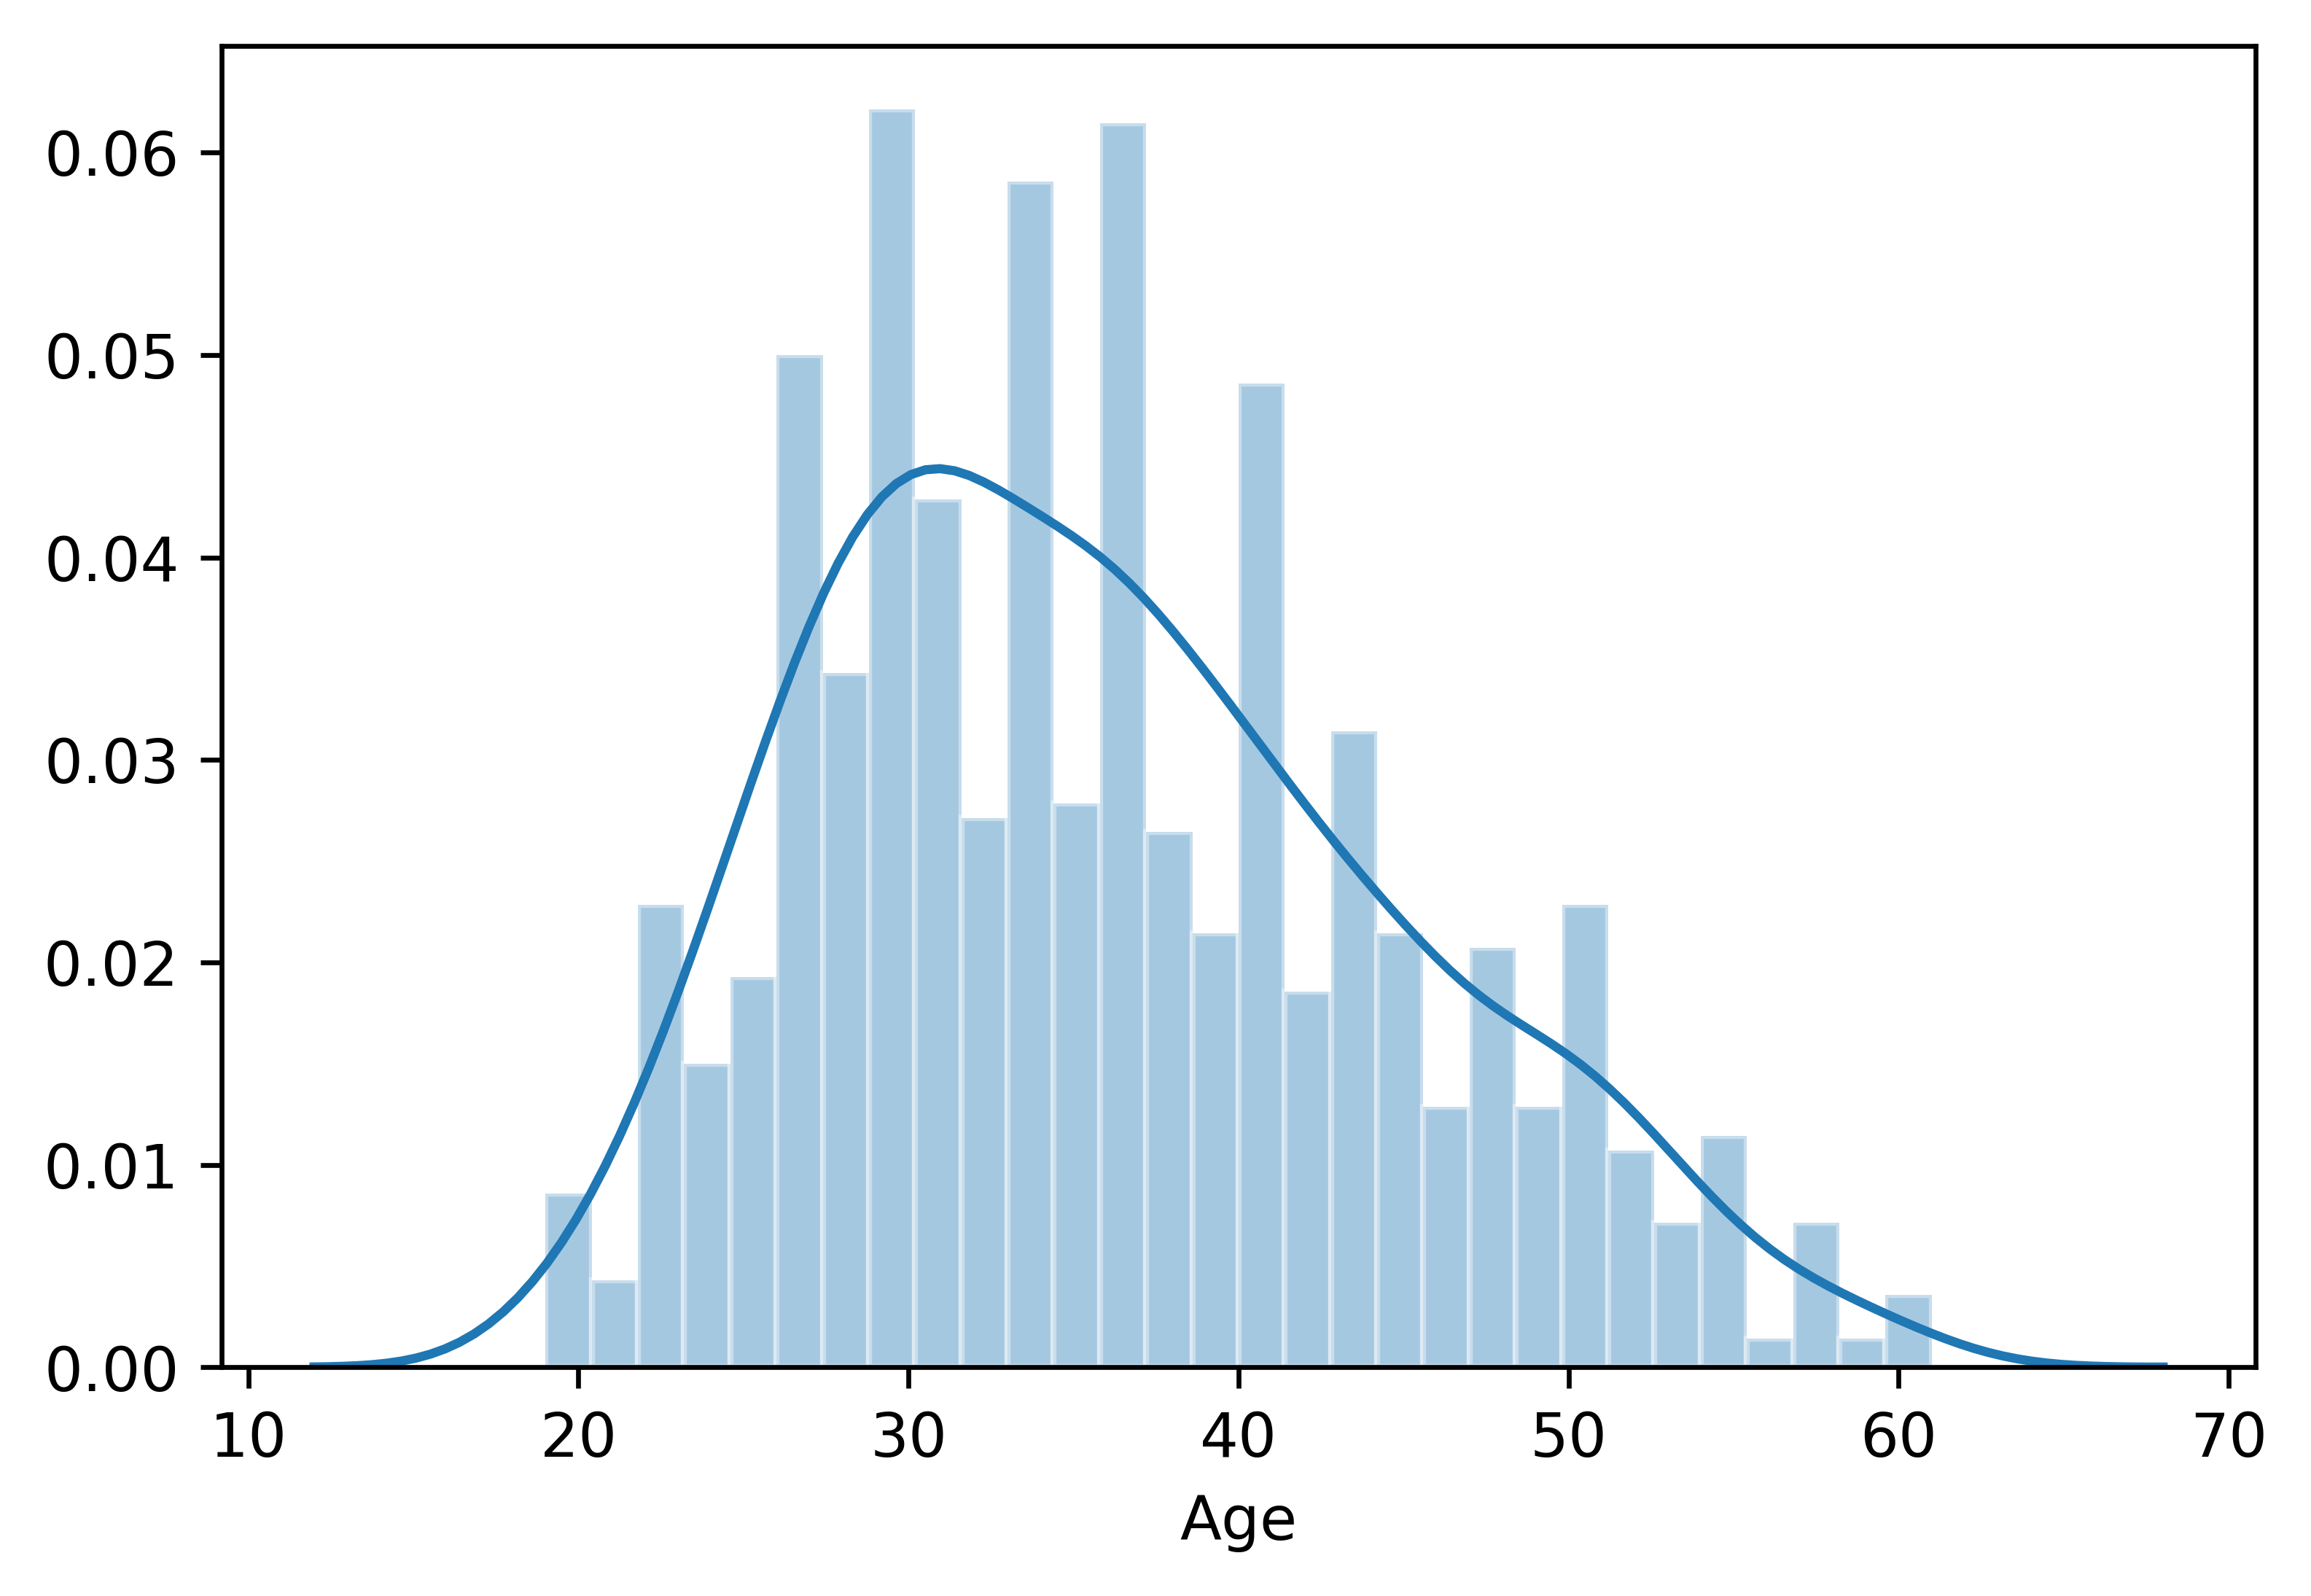

In [16]:
# Histogram of Age
fig = plt.figure(dpi = 600)
sns.distplot(Ad['Age'], hist_kws={'ec':'white'}, bins=30)

C:\Users\babak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 3600x2400 with 0 Axes>

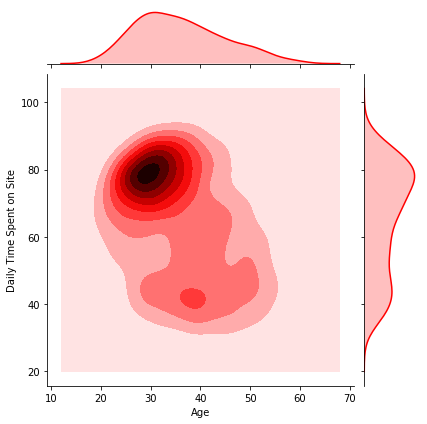

In [26]:
# Lets check the daily time spent on Site vs Age

fig = plt.figure(dpi = 600)
sns.jointplot(x='Age',y= 'Daily Time Spent on Site',
             data = Ad, kind='kde',color='red')

In [23]:
# Seperate data to train and test data set
from sklearn.model_selection import train_test_split

In [25]:
Ad.keys()

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [43]:
X = Ad[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]
y = Ad['Clicked on Ad']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.4, random_state=101)

In [45]:
# develop logistic regression model
from sklearn.linear_model import LogisticRegression

In [46]:
logreg = LogisticRegression()

In [47]:
logreg.fit(X_train,y_train)

C:\Users\babak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
from sklearn.metrics import classification_report

In [51]:
predict = logreg.predict(X_test)

In [52]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       206
           1       0.92      0.88      0.90       194

   micro avg       0.91      0.91      0.91       400
   macro avg       0.91      0.90      0.90       400
weighted avg       0.91      0.91      0.90       400

